#**Q1->What is NumPy, and why is it widely used in Python**
#**sol->**

NumPy (Numerical Python) is a powerful library for numerical computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these data structures efficiently.  

### **Why is NumPy widely used?**  

1. **Performance**: NumPy is significantly faster than Python lists because it uses optimized C and Fortran code under the hood. It also supports vectorized operations, which reduce the need for slow Python loops.  

2. **Multi-Dimensional Arrays**: The `ndarray` object allows efficient storage and manipulation of multi-dimensional data.  

3. **Mathematical Functions**: NumPy provides built-in functions for linear algebra, statistics, Fourier transforms, and more.  

4. **Broadcasting**: This allows operations between arrays of different shapes without needing explicit looping.  

5. **Integration with Other Libraries**: Many scientific computing and machine learning libraries (like SciPy, pandas, TensorFlow, and scikit-learn) use NumPy as their core data structure.  

6. **Memory Efficiency**: NumPy arrays consume less memory compared to Python lists because they store data in a contiguous block of memory, which improves cache performance.  

### **Example Usage**  

```python
import numpy as np

# Creating a NumPy array
arr = np.array([1, 2, 3, 4, 5])

# Performing operations
print(arr * 2)  # Output: [ 2  4  6  8 10]

# Creating a 2D array (Matrix)
matrix = np.array([[1, 2, 3], [4, 5, 6]])
print(matrix.shape)  # Output: (2, 3)
```


#**Q2-> How does broadcasting work in NumPy?**
#**Sol->**

### **NumPy Broadcasting Explained**  

Broadcasting in NumPy allows operations between arrays of different shapes without explicitly resizing or duplicating data. This makes computations more efficient and memory-friendly.  

### **How It Works**  

When performing operations on arrays of different shapes, NumPy **automatically expands** the smaller array to match the shape of the larger one, without physically copying data.  

#### **Broadcasting Rules**  

1. **Compare shapes from right to left.**  
2. **Dimensions must be equal** OR **one of them must be 1** OR **one of them is missing (in case of different rank arrays).**  
3. If a dimension is 1, NumPy "stretches" it to match the other array.  

---

### **Examples of Broadcasting**  

#### **1. Scalar and Array**  
```python
import numpy as np

arr = np.array([1, 2, 3])
result = arr + 10  # The scalar (10) is "broadcasted" to match the shape of arr

print(result)  # Output: [11 12 13]
```
 **Why?** The scalar `10` is treated as `[10, 10, 10]` before addition.  

---

#### **2. Two Arrays (Same Dimensions)**  
```python
arr1 = np.array([1, 2, 3])
arr2 = np.array([4, 5, 6])

result = arr1 + arr2
print(result)  # Output: [5 7 9]
```
 **Why?** Both arrays have the same shape, so element-wise addition occurs naturally.  

---

#### **3. Different Shapes (Expanding a Dimension)**  
```python
arr1 = np.array([[1], [2], [3]])  # Shape (3,1)
arr2 = np.array([10, 20, 30])     # Shape (1,3)

result = arr1 + arr2  # arr1 expands to (3,3), arr2 expands to (3,3)
print(result)
```
**Output:**  
```
[[11 21 31]
 [12 22 32]
 [13 23 33]]
```
 **Why?**  
- `arr1` (3,1) expands to (3,3):  
  ```
  [[1 1 1]
   [2 2 2]
   [3 3 3]]
  ```
- `arr2` (1,3) expands to (3,3):  
  ```
  [[10 20 30]
   [10 20 30]
   [10 20 30]]
  ```

---

### **When Broadcasting Fails (Shape Mismatch)**  
```python
arr1 = np.array([1, 2, 3])   # Shape (3,)
arr2 = np.array([[1, 2], [3, 4]])  # Shape (2,2)

result = arr1 + arr2  # Error: operands could not be broadcast together
```


#**Q3->A What is a Pandas DataFrame?**
#**Sol->**
### **What is a Pandas DataFrame?**  

A **Pandas DataFrame** is a **two-dimensional, labeled data structure** in Python, similar to a spreadsheet or SQL table. It is part of the **pandas** library and is widely used for data analysis and manipulation.  

### **Key Features of a DataFrame:**  
 **Tabular Structure** – It consists of rows and columns, like an Excel table.  
 **Labeled Index** – Rows and columns have labels for easy access.  
 **Supports Multiple Data Types** – Can store integers, floats, strings, etc.  
 **Built-in Functions** – Provides methods for filtering, grouping, sorting, and analyzing data.  

---

### **Creating a DataFrame**  

#### **1. From a Dictionary**
```python
import pandas as pd  

# Creating a DataFrame from a dictionary  
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Age': [25, 30, 35],
    'City': ['New York', 'Los Angeles', 'Chicago']
}

df = pd.DataFrame(data)
print(df)
```
**Output:**
```
     Name  Age         City
0   Alice   25     New York
1     Bob   30  Los Angeles
2  Charlie   35     Chicago
```

---

#### **2. From a CSV File**
```python
df = pd.read_csv("data.csv")
print(df.head())  # Display the first 5 rows
```

---

### **Accessing Data in a DataFrame**  

#### **1. Selecting Columns**
```python
print(df['Name'])  # Get a single column
print(df[['Name', 'Age']])  # Get multiple columns
```

#### **2. Selecting Rows by Index**
```python
print(df.loc[0])   # Select a row by label-based index
print(df.iloc[1])  # Select a row by position-based index
```

#### **3. Filtering Data**
```python
print(df[df['Age'] > 28])  # Get rows where Age > 28
```

---

### **Modifying a DataFrame**  

#### **Adding a Column**
```python
df['Salary'] = [50000, 60000, 70000]  # Add a new column
```

#### **Updating Values**
```python
df.at[1, 'Age'] = 32  # Update a specific value
```

#### **Removing Columns or Rows**
```python
df.drop(columns=['City'], inplace=True)  # Remove a column
df.drop(index=2, inplace=True)  # Remove a row
```

---

### **Why Use Pandas DataFrame?**  
✔ **Easier Data Handling** – Unlike NumPy arrays, DataFrames support labeled data.  
✔ **Powerful Data Analysis** – Supports filtering, aggregation, and transformation.  
✔ **Integration with Other Libraries** – Works well with Matplotlib, NumPy, and SciPy.  


#**Q4->Explain the use of the groupby() method in Pandas.**
#**Sol->**

### **Understanding the `groupby()` Method in Pandas**  

The **`groupby()`** method in Pandas is used to **group data based on values in one or more columns**. It is useful for **aggregating, summarizing, and analyzing** data by categories, similar to SQL's `GROUP BY` operation.  

---

### **How `groupby()` Works**  

The `groupby()` method follows these steps:  
1. **Splits** the data into groups based on a column(s).  
2. **Applies** an aggregation function (e.g., sum, mean, count) to each group.  
3. **Combines** the results into a new DataFrame.  

---

### **Basic Example of `groupby()`**  

#### **1. Grouping by a Single Column**  

```python
import pandas as pd  

# Creating a sample DataFrame  
data = {
    'Department': ['HR', 'IT', 'HR', 'IT', 'Finance', 'Finance', 'HR'],
    'Employee': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', 'Frank', 'Grace'],
    'Salary': [50000, 70000, 55000, 80000, 60000, 65000, 52000]
}

df = pd.DataFrame(data)

# Grouping by 'Department' and calculating the average salary per department  
grouped = df.groupby('Department')['Salary'].mean()

print(grouped)
```
**Output:**
```
Department
Finance    62500.0
HR         52333.3
IT         75000.0
Name: Salary, dtype: float64
```
📌 **Explanation:** The employees are grouped by their **Department**, and the average salary is calculated for each group.  

---

#### **2. Grouping by Multiple Columns**  

```python
grouped = df.groupby(['Department', 'Employee'])['Salary'].sum()
print(grouped)
```
This groups the data by **Department** and **Employee**, then sums the salaries (useful when an employee appears multiple times).  

---

#### **3. Using Multiple Aggregation Functions**  

You can apply multiple aggregation functions at once using `.agg()`.  

```python
grouped = df.groupby('Department')['Salary'].agg(['mean', 'sum', 'count'])
print(grouped)
```
**Output:**
```
             mean    sum  count
Department                     
Finance   62500.0  125000      2
HR        52333.3  157000      3
IT        75000.0  150000      2
```
  **Explanation:**  
- `mean`: Average salary in each department  
- `sum`: Total salary in each department  
- `count`: Number of employees in each department  

---

### **Why Use `groupby()`?**  
 **Efficient for Summarizing Data** – Quickly aggregate large datasets.  
 **Easy to Use** – Works similarly to SQL but with Pandas flexibility.  
 **Works with Multiple Functions** – Supports `sum()`, `mean()`, `count()`, etc.  

💡 **`groupby()` is a powerful tool for data analysis in Pandas!** 🚀

#**Q5->Why is Seaborn preferred for statistical visualizations?**
#**Sol->**

### **Why is Seaborn Preferred for Statistical Visualizations?**  

Seaborn is a Python visualization library built on **Matplotlib**, designed for **statistical data visualization**. It is widely preferred over Matplotlib for statistical plots because of its **ease of use, aesthetics, and built-in statistical functions**.  

---

### **Key Reasons Seaborn is Preferred**  

#### **1. Beautiful and Readable Visuals 📊**  
Seaborn provides **better default styles** than Matplotlib, making graphs look more polished and professional.  

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set_theme(style="darkgrid")
```

---

#### **2. Simplified Code for Complex Plots 📝**  
Seaborn makes it easy to create complex visualizations with minimal code.  

 **Example:** Creating a scatter plot with a regression line using `sns.regplot()`  
```python
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample Data
data = pd.DataFrame({'x': [1, 2, 3, 4, 5], 'y': [2, 4, 5, 4, 5]})

# Regression Plot
sns.regplot(x='x', y='y', data=data)
plt.show()
```
 **Matplotlib would require extra steps to achieve the same regression line.**  

---

#### **3. Built-in Support for Statistical Plots 📉**  
Seaborn provides **specialized functions for statistical visualizations**, such as:  
- **`sns.histplot()`** – Histograms  
- **`sns.boxplot()`** – Box plots  
- **`sns.violinplot()`** – Violin plots  
- **`sns.pairplot()`** – Pairwise relationships  
- **`sns.heatmap()`** – Correlation heatmaps  

 **Example: Boxplot to Show Distribution by Category**  
```python
import seaborn as sns

# Sample Data
tips = sns.load_dataset("tips")

# Boxplot
sns.boxplot(x="day", y="total_bill", data=tips)
plt.show()
```
 **Seaborn automatically adds category-based grouping.**  

---

#### **4. Automatic Handling of DataFrames 🖥️**  
Seaborn works **directly** with Pandas DataFrames, making it easy to visualize structured data.  
```python
sns.histplot(tips['total_bill'])
```
 **Matplotlib requires extra steps to convert DataFrame columns into lists first.**  

---

#### **5. Supports Multivariate Data Analysis 📊**  
Seaborn is great for **exploring relationships** between multiple variables.  
 **Example: Pairplot for Multi-variable Relationships**  
```python
sns.pairplot(tips, hue="sex")
plt.show()
```
 This **automatically plots multiple scatter plots** to visualize relationships.  

---


#**Q6->What are the differences between NumPy arrays and Python lists?**
#**Sol->**

### **Differences Between NumPy Arrays and Python Lists**  

Both **NumPy arrays** and **Python lists** store collections of elements, but **NumPy arrays** are optimized for numerical computations, while **Python lists** are more general-purpose.  

| Feature            | **NumPy Arrays**  | **Python Lists**  |
|-------------------|----------------|----------------|
| **Performance** | Faster (C-based, optimized memory handling) | Slower (Python's built-in data structures) |
| **Data Type** | Requires same data type (e.g., all integers or floats) | Can store mixed data types (e.g., int, float, string) |
| **Memory Efficiency** | More compact (stores elements in contiguous memory) | Less efficient (stores pointers to objects) |
| **Mathematical Operations** | Supports **vectorized** operations (`arr * 2` multiplies each element) | Requires looping (`[x * 2 for x in list]`) |
| **Multidimensional Support** | Supports multi-dimensional arrays (e.g., matrices) | Only 1D and requires nested lists for 2D+ |
| **Built-in Functions** | Rich numerical functions (`np.mean()`, `np.sum()`) | Limited numerical functions |
| **Indexing & Slicing** | More powerful (supports boolean indexing, broadcasting) | Basic indexing and slicing |

---

### **Examples**  

#### **1. Performance Difference**  
```python
import numpy as np
import time

# NumPy Array
arr = np.arange(1_000_000)
start = time.time()
arr = arr * 2  # Vectorized operation
end = time.time()
print(f"NumPy Time: {end - start:.5f} sec")

# Python List
lst = list(range(1_000_000))
start = time.time()
lst = [x * 2 for x in lst]  # Loop-based operation
end = time.time()
print(f"Python List Time: {end - start:.5f} sec")
```
 **NumPy is much faster** because of optimized C implementations.

---

#### **2. Data Type Handling**  
```python
import numpy as np

arr = np.array([1, 2, 3])   # All integers (efficient)
lst = [1, 2, "three"]       # Mixed types (less efficient)
```
 NumPy enforces **homogeneous** data types, while Python lists can hold **heterogeneous** data.

---

#### **3. Mathematical Operations**  
```python
import numpy as np

arr = np.array([1, 2, 3])
print(arr * 2)  # Output: [2 4 6]  (vectorized operation)

lst = [1, 2, 3]
print([x * 2 for x in lst])  # Output: [2, 4, 6] (loop-based)
```
 **NumPy allows direct mathematical operations**, whereas Python lists require explicit loops.

---

#### **4. Multidimensional Support**  
```python
import numpy as np

# 2D NumPy Array (Matrix)
arr = np.array([[1, 2, 3], [4, 5, 6]])
print(arr.shape)  # Output: (2,3)

# 2D Python List (Nested lists)
lst = [[1, 2, 3], [4, 5, 6]]
print(len(lst), len(lst[0]))  # Output: 2, 3
```
 NumPy **natively supports** multi-dimensional arrays, whereas Python lists rely on nesting.

---

### **When to Use What?**  

 **Use NumPy Arrays** if:  
- You need fast numerical computations  
- You’re working with large datasets  
- You need built-in mathematical functions  

 **Use Python Lists** if:  
- You need to store mixed data types  
- You’re working with small datasets and general-purpose data manipulation  


#**Q7->What is a heatmap, and when should it be used?**
#**Sol->**

A **heatmap** is a **graphical representation of data where individual values are represented using color gradients**. It is commonly used to visualize relationships between variables, detect patterns, and highlight high/low values.  

---

### **When Should You Use a Heatmap?**  

 **1. Correlation Between Variables** – Used in statistics & data science to **show relationships** between variables in a dataset.  
 **2. Visualizing Large Data Matrices** – Helpful for displaying **2D numerical data** compactly.  
 **3. Identifying Trends & Anomalies** – Makes it easy to **spot patterns**, **clusters**, or **outliers** in data.  
 **4. Website & App Analytics** – Tracks user engagement (e.g., where users click the most).  
 **5. Business & Financial Analysis** – Used for sales performance, stock trends, and customer segmentation.  

---

### **Example: Creating a Heatmap in Seaborn**  

#### **1. Heatmap for Correlation Matrix**  

```python
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Sample dataset
data = {
    'Math': [90, 80, 85, 70, 75],
    'Science': [85, 95, 80, 60, 65],
    'English': [78, 82, 88, 90, 85]
}

df = pd.DataFrame(data)

# Compute the correlation matrix
corr = df.corr()

# Create a heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()
```
 **What This Does:**  
- `corr = df.corr()` – Computes correlation between columns.  
- `sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")` – Creates a **heatmap** with values labeled, using a blue-red color gradient.  

---

### **Interpreting a Heatmap**  
- **Darker colors** indicate **stronger relationships** (positive or negative).  
- **Lighter colors** show **weaker relationships** or **no correlation**.  
- `annot=True` adds **numerical values** to each cell for better understanding.  

---

### **Other Use Cases for Heatmaps**  

####  **Website Click Maps**  
Used in **UI/UX analysis** to track where users click the most on a webpage.  

####  **Confusion Matrices in Machine Learning**  
Used to analyze classification models (e.g., actual vs. predicted values).  

####  **Geographical Heatmaps**  
Used in **maps** to show population density, sales performance, or weather patterns.  

#**Q8->What does the term “vectorized operation” mean in NumPy?**
#**Sol->**

### **What is a Vectorized Operation in NumPy?**  

A **vectorized operation** in NumPy refers to performing operations on entire **arrays (vectors, matrices, or higher-dimensional tensors) at once** without using explicit loops. These operations are **highly optimized and much faster** than standard Python loops because they leverage **low-level optimizations in C and Fortran**.

---

### **Why Use Vectorized Operations?**  

 **Faster Execution** – Avoids slow Python loops by using **optimized C implementations**.  
 **More Readable Code** – Eliminates unnecessary `for` loops, making code cleaner.  
 **Memory Efficient** – Uses **contiguous memory storage**, reducing overhead.  
 **Parallelized Computation** – Uses **SIMD (Single Instruction, Multiple Data)** for speed-up.  

---

### **Example: NumPy Vectorized vs. Python Loop **  

#### ** Using a Python Loop (Slow)**
```python
import time

# Creating large lists
size = 1_000_000
list1 = range(size)
list2 = range(size)

# Start time
start = time.time()

# Element-wise addition using loop
result = [a + b for a, b in zip(list1, list2)]

# End time
end = time.time()
print(f"Python Loop Time: {end - start:.5f} sec")
```

---

#### ** Using NumPy Vectorized Operation (Fast)**
```python
import numpy as np

# Creating large NumPy arrays
arr1 = np.arange(size)
arr2 = np.arange(size)

# Start time
start = time.time()

# Element-wise addition (vectorized)
result = arr1 + arr2

# End time
end = time.time()
print(f"NumPy Vectorized Time: {end - start:.5f} sec")
```

---

### ** Common Vectorized Operations in NumPy**  

#### **1. Element-wise Arithmetic**  
```python
import numpy as np

arr = np.array([1, 2, 3, 4])

print(arr * 2)  # Multiply all elements by 2
# Output: [2 4 6 8]

print(arr + 10)  # Add 10 to all elements
# Output: [11 12 13 14]
```
 **No need for a loop!**

---

#### **2. Mathematical Functions**  
```python
arr = np.array([1, 4, 9, 16])

print(np.sqrt(arr))  # Square root of each element
# Output: [1. 2. 3. 4.]

print(np.exp(arr))  # Exponential function
# Output: [2.718 54.598 8103.08 8.89e+06]
```
 Works on **each element** simultaneously.  

---

#### **3. Boolean Masking (Filtering)**  
```python
arr = np.array([10, 20, 30, 40, 50])

print(arr[arr > 25])  # Filter values greater than 25
# Output: [30 40 50]
```
 **No need for an explicit `for` loop or `if` conditions!**  

#**Q9-> How does Matplotlib differ from Plotly?**
#**Sol->**

### **Matplotlib vs. Plotly: Key Differences**  

Matplotlib and Plotly are both popular Python libraries for data visualization, but they serve different purposes and have distinct features.  

---

### ** 1. Basic Difference**  
| Feature        | **Matplotlib** | **Plotly** |
|---------------|-----------------|---------------|
| **Type**      | Static, 2D plots | Interactive, web-based plots |
| **Ease of Use** | Simple for basic charts but complex for advanced ones | Intuitive, especially for interactive plots |
| **Customization** | Highly customizable but requires more code | Pre-built interactive features |
| **Performance** | Faster for simple plots | Better for handling large datasets interactively |
| **Integration** | Works well with Seaborn, Pandas, NumPy | Built for web apps (Dash), supports JavaScript |

---

### ** 2. Example Comparisons**  

#### ** Matplotlib: Basic Static Plot**  
```python
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 40]

plt.plot(x, y, marker='o', linestyle='-', color='b', label="Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Matplotlib Example")
plt.legend()
plt.show()
```
 **Best for static, publication-quality plots.**  

---

#### ** Plotly: Interactive Plot**  
```python
import plotly.express as px
import pandas as pd

# Sample data
df = pd.DataFrame({"x": [1, 2, 3, 4, 5], "y": [10, 20, 25, 30, 40]})

# Create interactive plot
fig = px.line(df, x="x", y="y", title="Plotly Interactive Example", markers=True)
fig.show()
```
 **Best for web-based, zoomable, and interactive charts.**  

---

### ** 3. Interactivity**  
- **Matplotlib**: Static (supports some interactivity via `mpl_interactions` or `widgets`).  
- **Plotly**: Built-in **zoom, hover tooltips, and animations**.  

 **Use Matplotlib for**: Reports, research, static visuals.  
 **Use Plotly for**: Dashboards, web applications, interactive presentations.  

 **For interactive data visualization, Plotly is the better choice!**

#**Q10->What is the significance of hierarchical indexing in Pandas?**
#**Sol->**

### **Hierarchical Indexing in Pandas**  

Hierarchical indexing (also called **multi-indexing**) in **Pandas** allows a DataFrame or Series to have **multiple levels of row or column labels**. This makes it easier to work with **multi-dimensional** datasets in a structured way.  

---

### **Why is Hierarchical Indexing Useful?**  

 **Organizes Complex Data** – Helps represent **grouped or structured data** efficiently.  
 **Easy Data Selection** – Enables powerful slicing & filtering based on **multiple index levels**.  
 **Improves Performance** – Optimized for **fast lookups and operations** on grouped data.  
 **Supports Pivot Tables** – Essential for **reshaping and analyzing hierarchical data**.  

---

### ** Example 1: Creating a Multi-Index DataFrame**  

```python
import pandas as pd

# Creating a MultiIndex DataFrame
data = {
    'Sales': [100, 150, 200, 250],
    'Profit': [20, 30, 40, 50]
}

index = pd.MultiIndex.from_tuples([
    ('USA', 'New York'),
    ('USA', 'Los Angeles'),
    ('India', 'Mumbai'),
    ('India', 'Delhi')
], names=['Country', 'City'])

df = pd.DataFrame(data, index=index)

print(df)
```

 **Output:**
```
                Sales  Profit
Country City               
USA     New York    100      20
        Los Angeles 150      30
India   Mumbai      200      40
        Delhi       250      50
```
 The **two-level index (Country → City)** allows structured data representation.  

---

### ** Example 2: Accessing Data with Multi-Index**  

#### **1 Accessing a Specific Group (USA Data)**
```python
print(df.loc['USA'])
```
 **Output:**  
```
            Sales  Profit
City                    
New York     100      20
Los Angeles  150      30
```

#### ** Accessing a Specific City (Mumbai Data)**
```python
print(df.loc[('India', 'Mumbai')])
```
 **Output:**  
```
Sales     200
Profit     40
Name: (India, Mumbai), dtype: int64
```

---

### ** Example 3: Converting a Column to Multi-Index**  

```python
df = df.stack()  # Converts columns ('Sales', 'Profit') into MultiIndex
print(df)
```
 **Output:**
```
Country  City         Sales
USA      New York       100
         Los Angeles    150
India    Mumbai         200
         Delhi          250
```
 **Now 'Sales' and 'Profit' are part of the index!**  

---

### ** When to Use Hierarchical Indexing?**  

 **Multi-dimensional data** (e.g., country-city hierarchy, company-department hierarchy).  
 **Time-series data** (e.g., year-month-day indexing).  
 **Grouping and pivot table operations**.  
 **Faster lookups and slicing** in structured datasets.  
 **Hierarchical indexing is essential for handling complex, structured datasets in Pandas!**

#**Q11->What is the role of Seaborn’s pairplot() function?**
#**Sol->**
### **Seaborn’s `pairplot()` Function: Role & Usage**  

The `pairplot()` function in **Seaborn** is used to create a **grid of scatter plots and histograms** that visualize pairwise relationships between numerical variables in a dataset. It is particularly useful for **exploratory data analysis (EDA)** to identify **patterns, correlations, and outliers**.

---

### **Key Features of `pairplot()`**
 **Plots relationships between all numerical columns** in a DataFrame.  
 **Creates scatter plots for variable pairs** and histograms (or KDE plots) for individual distributions.  
 **Color-coding (`hue` parameter)** allows easy differentiation of categorical data.  
 **Helps detect patterns, trends, and correlations** in multi-dimensional data.  

---

### **Example: Basic `pairplot()` Usage**
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load a sample dataset
df = sns.load_dataset("iris")

# Create a pairplot
sns.pairplot(df)

# Show the plot
plt.show()
```
 **What This Does:**  
- Loads the **Iris dataset** (which has multiple numerical columns).  
- Creates a **scatter plot** for each pair of variables.  
- Diagonal plots show **histograms** of individual features.  

---

### **Example: Using `hue` to Differentiate Categories**  
```python
sns.pairplot(df, hue="species", palette="coolwarm")
plt.show()
```
 **What This Does:**  
- Colors points based on the `"species"` column.  
- Helps **identify group differences** between species in the dataset.  

---
### **Example: Using KDE (Kernel Density Estimate) Instead of Histograms**
```python
sns.pairplot(df, diag_kind="kde")
plt.show()
```
 **Replaces histograms with smoother **KDE plots** for better distribution visualization.  

---

### ** When Should You Use `pairplot()`?**  

 **Exploratory Data Analysis (EDA)** – Quickly visualize relationships between variables.  
 **Detecting Correlations** – See how numerical features interact.  
 **Identifying Outliers & Clusters** – Spot unusual data points and clusters.  
 **Understanding Multivariate Distributions** – Get an overall view of feature relationships.  

 **Seaborn’s `pairplot()` is an essential tool for quick and insightful data exploration!**

#**Q12->What is the purpose of the describe() function in Pandas?**
#**Sol->**
### **Purpose of `describe()` Function in Pandas**  

The `describe()` function in **Pandas** is used to generate **summary statistics** for numerical (and optionally categorical) columns in a DataFrame. It helps in **exploratory data analysis (EDA)** by providing insights into data distribution, central tendency, and dispersion.

---

### **What Does `describe()` Show?**  

By default, `df.describe()` returns statistics for **numerical columns**:  

| Statistic | Meaning |
|-----------|---------|
| **count** | Number of non-null values |
| **mean** | Average (arithmetic mean) of the column |
| **std** | Standard deviation (spread of the data) |
| **min** | Minimum value |
| **25%** | First quartile (Q1 - 25th percentile) |
| **50%** | Median (Q2 - 50th percentile) |
| **75%** | Third quartile (Q3 - 75th percentile) |
| **max** | Maximum value |

---

### **Example: Using `describe()` for Numerical Data**
```python
import pandas as pd

# Sample DataFrame
data = {
    'Age': [25, 30, 35, 40, 45, 50, 55, 60, 65],
    'Salary': [4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000]
}

df = pd.DataFrame(data)

# Summary statistics
print(df.describe())
```
**Output:**
```
             Age      Salary
count   9.00000     9.00000
mean   45.00000  6000.00000
std    12.99038  1414.21356
min    25.00000  4000.00000
25%    35.00000  5000.00000
50%    45.00000  6000.00000
75%    55.00000  7000.00000
max    65.00000  8000.00000
```
**Insight:** The average (mean) salary is **$6000**, and the standard deviation is **$1414**, indicating salary variation.

---

### ** Using `describe()` for Categorical Data**  
By default, `describe()` only works for numerical columns. To include **categorical columns**, use:
```python
print(df.describe(include='object'))  # For categorical data
```

 **For categorical columns, it returns:**  
- `count` – Number of non-null values  
- `unique` – Number of unique values  
- `top` – Most frequent category  
- `freq` – Frequency of the top category  



#**Q13->Why is handling missing data important in Pandas?**
#**Sol->**
### **Why Is Handling Missing Data Important in Pandas?**  

Handling missing data is **crucial** because missing values can:  

 **Distort analysis** – Skew statistical calculations like mean, median, and correlation.  
 **Break machine learning models** – Many models don’t accept NaN (Not a Number) values.  
 **Affect data visualization** – Missing values can lead to gaps in plots.  
 **Reduce accuracy** – Poor handling can lead to biased results or incorrect conclusions.  

---

### **Common Ways to Handle Missing Data in Pandas**  

#### **Detecting Missing Data**  
```python
import pandas as pd

# Sample DataFrame with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', None],
    'Age': [25, None, 30, 35],
    'Salary': [5000, 6000, None, 8000]
}
df = pd.DataFrame(data)

# Check for missing values
print(df.isnull())  # Shows True where values are missing
print(df.isnull().sum())  # Count of missing values per column
```
 **Output:**  
```
    Name    Age  Salary
0  False  False  False
1  False   True  False
2  False  False   True
3   True  False  False

Name      1
Age       1
Salary    1
dtype: int64
```
 **Identifies missing values in the dataset.**  

---

#### **Removing Missing Data**  
```python
df_cleaned = df.dropna()  # Drops rows with any missing values
print(df_cleaned)
```
 **Use when missing values are few and won’t impact analysis.**  

---

#### **Filling Missing Data (Imputation)**  
- **Fill with a specific value:**  
```python
df_filled = df.fillna(0)  # Replaces NaN with 0
```
- **Fill with the column mean/median/mode:**  
```python
df['Age'].fillna(df['Age'].mean(), inplace=True)  # Replace NaN with mean
df['Salary'].fillna(df['Salary'].median(), inplace=True)  # Replace with median
```
- **Forward/Backward Fill (Propagate Nearby Values)**  
```python
df.fillna(method='ffill', inplace=True)  # Forward fill
df.fillna(method='bfill', inplace=True)  # Backward fill
```
 **Best when missing values follow a pattern or trend.**  

---

### **When Should You Handle Missing Data?**  

 **Before running any statistical analysis.**  
 **Before feeding data into machine learning models.**  
 **Before visualizing data to avoid misleading graphs.**  

 **Handling missing data ensures accurate, reliable, and high-quality analysis!**

#**Q14->What are the benefits of using Plotly for data visualization?**
#**Sol->**

### **Benefits of Using Plotly for Data Visualization**   

Plotly is a **powerful, interactive, and web-based** data visualization library in Python. It is widely used for creating **beautiful and dynamic visualizations** with minimal effort.  

---

### **Key Advantages of Plotly**  

 **1. Interactive Charts**  
- Unlike static plots in **Matplotlib**, Plotly charts are **zoomable, hoverable, and clickable**.  
- Users can explore data by **panning, selecting, and hovering** over points.  
```python
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", color="continent", hover_name="country")
fig.show()
```
 **Creates an interactive scatter plot with hover details.**  

---
 **2. Wide Range of Chart Types**  
- Supports **basic charts** (line, bar, scatter) and **advanced visuals** like 3D plots, choropleth maps, and financial charts.  
- Best for **dashboards, analytics, and reporting.**  
```python
fig = px.line(df, x="year", y="lifeExp", color="continent")
fig.show()
```
 **Creates an interactive line chart for life expectancy trends.**  

---

 **3. Easy Integration with Dash for Web Apps**  
- Plotly works seamlessly with **Dash**, allowing users to create **interactive web dashboards** without JavaScript.  
- Ideal for **data-driven web applications.**  

---

 **4. Supports Multiple Languages & Web Rendering**  
- Works with **Python, R, Julia, and JavaScript**.  
- Uses **HTML5, SVG, and WebGL**, making it **lightweight and fast**.  

---

 **5. Built-in Data Handling & Pandas Integration**  
- Supports **Pandas DataFrames** directly, making it easier to visualize structured data.  
- Automatic **color grouping, legends, and axis labeling.**  

---

 **6. Beautiful and Customizable**  
- Default themes are visually appealing.  
- Fully customizable layouts, colors, annotations, and styles.  
```python
fig.update_layout(title="Customized Plot", template="plotly_dark")
```
**Applies a dark theme for an elegant look.**  

---

### **When Should You Use Plotly?**  

 **For interactive and dynamic visualizations.**  
 **For creating web-based dashboards (with Dash).**  
 **When handling large datasets that require zooming/panning.**  
 **For visually appealing and customizable plots.**  

 **Plotly is the best choice for interactive and high-quality visualizations in Python!**

#**Q15->How does NumPy handle multidimensional arrays?**
#**Sol->**
### ** How NumPy Handles Multidimensional Arrays**  

NumPy is designed to efficiently work with **multidimensional arrays (ndarrays)**, enabling fast numerical computations. It provides powerful tools for creating, manipulating, and performing operations on **arrays of any dimension**.

---

### **1. Creating Multidimensional Arrays**  
NumPy arrays can have **any number of dimensions (axes)**.  

```python
import numpy as np

# 1D array (Vector)
arr_1d = np.array([1, 2, 3])

# 2D array (Matrix)
arr_2d = np.array([[1, 2, 3], [4, 5, 6]])

# 3D array (Tensor)
arr_3d = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

print("1D Shape:", arr_1d.shape)  # (3,)
print("2D Shape:", arr_2d.shape)  # (2, 3)
print("3D Shape:", arr_3d.shape)  # (2, 2, 2)
```
 **NumPy supports arrays of any dimension and handles them efficiently.**

---

### **2. Accessing & Indexing Multidimensional Arrays**  
- **2D arrays:** Use `arr[row, column]`  
- **3D arrays:** Use `arr[depth, row, column]`  

```python
print(arr_2d[1, 2])   # Access element at row=1, col=2 → Output: 6
print(arr_3d[0, 1, 1]) # Access element at depth=0, row=1, col=1 → Output: 4
```

 **NumPy provides efficient indexing for multidimensional arrays.**

---

### **3. Reshaping & Transposing**  
- **Reshape arrays into different dimensions:**  
```python
arr = np.arange(6)  # [0, 1, 2, 3, 4, 5]
arr_reshaped = arr.reshape(2, 3)  # Converts to 2D array (2 rows, 3 cols)
print(arr_reshaped)
```
 **Reshaping helps in transforming arrays without changing data.**

- **Transpose (swap axes) of a matrix:**  
```python
arr_T = arr_2d.T
print(arr_T)  # Flips rows & columns
```
 **Useful for mathematical operations like matrix multiplication.**

---

### **4. Broadcasting in Multidimensional Arrays**  
Broadcasting allows operations on arrays of different shapes **without explicit looping**.  
```python
arr = np.array([[1, 2, 3], [4, 5, 6]])
arr_broadcast = arr + np.array([10, 20, 30])  # Adds row-wise
print(arr_broadcast)
```
 **NumPy automatically expands smaller arrays to match dimensions.**

---

### **5. Performance Optimization**  
NumPy handles multidimensional arrays efficiently because:  
 **Uses C under the hood** → Much faster than Python lists.  
 **Vectorized operations** → Avoids slow Python loops.  
 **Efficient memory layout** → Stores elements contiguously in memory.  

```python
arr = np.random.rand(1000, 1000)
result = arr * 2  # Vectorized operation (fast)
```
**NumPy’s optimized operations make it ideal for scientific computing and AI.**

---

### **Summary: Why NumPy for Multidimensional Arrays?**  
 **Efficient storage and memory handling** (better than lists)  
 **Powerful operations on high-dimensional data** (indexing, reshaping, broadcasting)  
 **Fast computations** (C-based optimizations, vectorization)  

 **NumPy is the go-to library for working with multidimensional arrays in Python!**

#**Q16->What is the role of Bokeh in data visualization?**
#**Sol->**

### **Role of Bokeh in Data Visualization**   

Bokeh is a **Python library for interactive data visualization** that is designed for creating **modern, web-based graphics**. It is widely used for **big data visualization, dashboards, and interactive plots**.

---

### **Why Use Bokeh?**  

**1. Interactive Visualizations**  
- Unlike static charts in **Matplotlib**, Bokeh provides **zooming, panning, tooltips, and real-time updates**.  

**2. Web-Ready & JavaScript-Based**  
- Generates **HTML & JavaScript** visualizations that work in web browsers.  
- No need to learn JavaScript – fully controlled from Python.  

**3. Handles Large Datasets Efficiently**  
- Supports **big data visualization** using WebGL and **data streaming**.  
- Faster rendering than Matplotlib for **millions of points**.  

**4. Easy Integration with Web Frameworks**  
- Works seamlessly with **Flask, Django, and Jupyter Notebooks**.  
- Can be embedded in dashboards.  

---

### **Example: Creating a Simple Bokeh Plot**  
```python
from bokeh.plotting import figure, show
from bokeh.io import output_file

# Output file
output_file("bokeh_plot.html")

# Create figure
p = figure(title="Bokeh Line Chart", x_axis_label="X", y_axis_label="Y")

# Add a line plot
p.line([1, 2, 3, 4, 5], [5, 7, 2, 4, 6], line_width=2, color="blue")

# Show the plot
show(p)
```
 **Generates an interactive HTML chart with zoom and hover tools.**  

---

### **🔹 Key Features of Bokeh**  

 **Basic Charts** – Line, Bar, Scatter, Histogram, Area  
 **Advanced Charts** – Heatmaps, Network Graphs, Maps, Linked Plots  
 **Interactive Widgets** – Buttons, Sliders, Dropdowns  
 **Streaming Data Support** – Real-time updates for dashboards  


#**Q17-> Explain the difference between apply() and map() in Pandas?**
#**Sol->**
### **Difference Between `apply()` and `map()` in Pandas**  

Both `apply()` and `map()` are used in **Pandas** to **apply functions** to DataFrame columns or Series, but they differ in scope and flexibility.

---

### **1. `map()` – Works on Series (Element-wise Operation)**  
**Applies a function element-wise to a Pandas Series.**  
Works only on **single-column (Series) data**, not entire DataFrames.  

#### **Example: Using `map()` on a Series**
```python
import pandas as pd

# Sample DataFrame
df = pd.DataFrame({'Name': ['Alice', 'Bob', 'Charlie'], 'Salary': [5000, 6000, 7000]})

# Apply function using map()
df['Salary'] = df['Salary'].map(lambda x: x * 1.10)  # Increase salary by 10%
print(df)
```
 **Use `map()` when working with a single column in a Series.**  

---

### **2. `apply()` – Works on Series & DataFrames**  
 Can be used on **both Series and DataFrames**.  
 Allows applying **custom functions** row-wise (`axis=1`) or column-wise (`axis=0`).  
 More powerful than `map()` for **complex transformations**.  

#### **Example 1: Using `apply()` on a Series**
```python
# Convert names to uppercase
df['Name'] = df['Name'].apply(lambda x: x.upper())
print(df)
```
 **Similar to `map()`, but more general.**  

#### ** Example 2: Using `apply()` on a DataFrame (Row-wise Operation)**
```python
# Define a custom function
def bonus(salary):
    return salary * 1.15 if salary > 6000 else salary * 1.10

# Apply function row-wise
df['New Salary'] = df['Salary'].apply(bonus)
print(df)
```
 **Use `apply()` for row-wise or column-wise operations on DataFrames.**  

---

### **Key Differences Between `apply()` and `map()`**  

| Feature         | `map()` | `apply()` |
|---------------|--------|--------|
| Works on | **Series** only | **Series & DataFrames** |
| Applies function to | **Each element individually** | **Entire row/column or individual elements** |
| Supports row-wise (`axis=1`)? |  No |  Yes |
| Supports complex functions? |  Limited |  More powerful |
| Example use case | Modify values in a **single column** | Transform values **across multiple columns** |

---

### **When to Use Which?**  
 **Use `map()`** when working with a **single Series column** for simple transformations.  
 **Use `apply()`** when performing **complex row-wise or column-wise operations** on a DataFrame.  

 **If you need more flexibility, `apply()` is the better choice!**

#**Q18->A What are some advanced features of NumPy?**
#**Sol->**
### **Advanced Features of NumPy **  

NumPy is a powerful library for numerical computing in Python. Beyond basic arrays, it offers **advanced features** that make it a **go-to tool for data science, machine learning, and scientific computing**.  

---

### **1. Broadcasting for Efficient Computation**  
 **Enables operations on arrays of different shapes without explicit loops.**  
```python
import numpy as np
a = np.array([[1], [2], [3]])  # Shape (3,1)
b = np.array([10, 20, 30])     # Shape (3,)
result = a + b  # NumPy automatically expands 'a' to match 'b'
print(result)
```
 **Saves memory and speeds up computations without explicit loops.**  

---

### **2. Vectorized Operations (Avoiding Loops)**  
 **Faster computations compared to Python loops.**  
```python
arr = np.arange(1_000_000)
result = arr * 2  # Vectorized operation (Much faster than looping)
```
 **Uses optimized C code under the hood, making it much faster.**  

---

### **3. Advanced Indexing & Boolean Masking**  
 **Extract, modify, or filter elements efficiently.**  
```python
arr = np.array([10, 20, 30, 40, 50])
mask = arr > 25  # Boolean mask
print(arr[mask])  # Output: [30 40 50]
```
📌 **No need for complex loops—Boolean masking simplifies selection.**  

---

### **4. Fancy Indexing (Indexing with Lists or Arrays)**  
 **Retrieve specific elements without loops.**  
```python
arr = np.array([10, 20, 30, 40, 50])
indices = [0, 2, 4]
print(arr[indices])  # Output: [10 30 50]
```
 **Works like an advanced lookup table.**  

---

### **5. Memory Mapping for Large Datasets**  
 **Allows working with huge datasets without loading everything into memory.**  
```python
arr = np.memmap('large_array.dat', dtype='float32', mode='w+', shape=(1000, 1000))
arr[500, 500] = 42  # Modify part of the array without loading everything into RAM
```
 **Great for handling terabytes of data efficiently!**  

---

### **6. Structured Arrays (Heterogeneous Data Types in a Single Array)**  
 **Allows storing different data types in a single NumPy array.**  
```python
data = np.array([(1, 'Alice', 25.5), (2, 'Bob', 30.2)],
                dtype=[('id', 'i4'), ('name', 'U10'), ('score', 'f4')])
print(data['name'])  # Output: ['Alice' 'Bob']
```
 **Useful for scientific computing and database-like operations.**  

---

### **7. Multi-Dimensional Aggregations (`axis` Parameter)**  
 **Perform operations across specific dimensions (rows/columns).**  
```python
arr = np.array([[1, 2, 3], [4, 5, 6]])
print(arr.sum(axis=0))  # Sum along columns → Output: [5 7 9]
print(arr.sum(axis=1))  # Sum along rows → Output: [ 6 15]
```
 **Faster and more efficient than looping over rows/columns.**  

---

### **8. Random Number Generation (`numpy.random`)**  
 **Generate random data for simulations, ML, and statistics.**  
```python
np.random.seed(42)  # Set seed for reproducibility
rand_array = np.random.rand(3, 3)  # Generate a 3x3 matrix of random numbers
print(rand_array)
```
 **Useful for AI, Monte Carlo simulations, and statistical modeling.**  

---

### **9. Fast Linear Algebra Operations (`numpy.linalg`)**  
 **Perform operations like matrix multiplication, eigenvalues, and determinants.**  
```python
A = np.array([[2, 3], [4, 5]])
det_A = np.linalg.det(A)  # Compute determinant
print(det_A)


#**Q19->How does Pandas simplify time series analysis?**
#**Sol->**

### **How Pandas Simplifies Time Series Analysis **  

Pandas provides **powerful tools** to handle, manipulate, and analyze **time series data** efficiently. Time series data appears in **finance, economics, weather forecasting, and IoT applications**.  

---

### **1. Handling Date and Time Data Efficiently**  
 Pandas makes it **easy to convert strings or numbers into datetime objects**.  

```python
import pandas as pd

# Convert a date string to a datetime object
date_series = pd.to_datetime(['2025-03-16', '2025-03-17', '2025-03-18'])
print(date_series)
```
 **Automatically recognizes dates and allows easy manipulation.**  

---

### **2. Date Indexing & Time-Based Selection**  
 **Set a DateTime index** for easy slicing and filtering.  

```python
# Create a DataFrame with time-based index
date_rng = pd.date_range(start='2025-01-01', periods=5, freq='D')
df = pd.DataFrame({'Value': [10, 20, 30, 40, 50]}, index=date_rng)

# Select data from a specific date
print(df.loc['2025-01-03'])  # Fetch data for Jan 3, 2025
```
 **Easier selection compared to using manual date filters.**  

---

### **3. Resampling & Frequency Conversion**  
 **Change the frequency of time series data (daily, weekly, monthly, etc.).**  

```python
df_resampled = df.resample('W').mean()  # Resample to weekly data
print(df_resampled)
```
 **Useful for downsampling or upsampling time series data.**  

---

### **4. Handling Missing Time Series Data**  
 **Fill missing values intelligently using different strategies.**  

```python
df.loc['2025-01-03'] = None  # Introduce a missing value
df_filled = df.fillna(method='ffill')  # Forward-fill missing values
print(df_filled)
```
 **Prevents gaps in time series analysis.**  

---

### **5. Moving Averages & Rolling Statistics**  
 **Compute rolling mean (e.g., 7-day moving average) for smoothing trends.**  

```python
df['Rolling_Mean'] = df['Value'].rolling(window=2).mean()
print(df)
```
 **Great for trend analysis and noise reduction.**  

---

### **6. Shifting & Lagging Data**  
 **Shift time series forward or backward to analyze trends.**  

```python
df['Lagged'] = df['Value'].shift(1)  # Shift data by one day
print(df)
```
 **Essential for lag analysis in time series forecasting.**  

---

### **7. Time Zone Handling & Conversion**  
 **Easily convert between time zones.**  

```python
df.index = df.index.tz_localize('UTC')  # Assign UTC timezone
df = df.tz_convert('America/New_York')  # Convert to New York time
print(df)
```
 **Critical for global financial and IoT data analysis.**  

---

### **8. Date & Time Components Extraction**  
 **Extract useful components like year, month, day, or hour.**  

```python
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
print(df)
```
 **Helps in time-based grouping and filtering.**  

---

### **9. Auto-Generating Date Ranges**  
 **Quickly create sequences of dates for missing data.**  

```python
date_range = pd.date_range(start='2025-01-01', periods=10, freq='D')
print(date_range)
```
 **Useful for simulations, modeling, and filling in missing time series data.**  

---

### **10. Powerful Time-Based Grouping (`groupby()` with Time)**  
 **Aggregate data based on time periods.**  

```python
df.groupby(df.index.month).sum()  # Sum values for each month
```
 **Great for monthly, quarterly, or yearly analysis.**  

#**Q20->A What is the role of a pivot table in Pandas?**
#**Sol->**
### **Role of a Pivot Table in Pandas **  

A **pivot table** in Pandas is a **powerful tool** for **summarizing, reorganizing, and analyzing** large datasets. It allows you to **group, aggregate, and reshape data** in a way that makes it easier to extract insights.  

---

### **1. Creating a Pivot Table in Pandas**  
 **Syntax:**  
```python
df.pivot_table(values, index, columns, aggfunc)
```
- **values** → Column(s) to aggregate  
- **index** → Row labels (grouping)  
- **columns** → Column labels  
- **aggfunc** → Aggregation function (default: `mean()`)  

---

### **2. Example: Pivot Table for Sales Data**  
#### **Sample Data**
```python
import pandas as pd

# Creating a sample DataFrame
data = {
    'Date': ['2024-01-01', '2024-01-01', '2024-01-02', '2024-01-02'],
    'Region': ['North', 'South', 'North', 'South'],
    'Sales': [200, 150, 300, 250]
}
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])  # Convert to datetime
print(df)
```

#### **Creating a Pivot Table**
```python
pivot_table = df.pivot_table(values='Sales', index='Date', columns='Region', aggfunc='sum')
print(pivot_table)
```
 **Reshapes data by grouping sales by date and region.**  

---

### **3. Key Features of Pivot Tables**  
 **Summarizes large datasets** using aggregation (`sum`, `mean`, `count`, etc.)  
 **Handles missing data** automatically  
 **Supports multiple aggregation functions**  
 **Can group by multiple levels**  

---

### **4. Multiple Aggregation Functions**
```python
pivot_table = df.pivot_table(values='Sales', index='Date', columns='Region', aggfunc=['sum', 'mean'])
print(pivot_table)
`` **Displays both sum and mean for each region.**  

---

### **5. Handling Missing Data in Pivot Tables**
 **Fill missing values with `fill_value`**  
```python
pivot_table = df.pivot_table(values='Sales', index='Date', columns='Region', aggfunc='sum', fill_value=0)
```
 **Prevents NaN values in summary tables.**  


#**Q21->Why is NumPy’s array slicing faster than Python’s list slicing?**
#**Sol->**
### **Why is NumPy’s Array Slicing Faster than Python’s List Slicing?**  

NumPy's array slicing is **significantly faster** than Python's list slicing due to **memory efficiency, optimized operations, and lower overhead**.  

---

### **1. NumPy Uses Views Instead of Copies**  
 **NumPy slicing returns a "view" (not a new object), so no extra memory is used.**  
 **Python lists create a new copy, which takes extra time & memory.**  

#### **Example: NumPy Slicing (View)**
```python
import numpy as np

arr = np.array([1, 2, 3, 4, 5])
sliced_arr = arr[1:4]  # Creates a view, not a copy
sliced_arr[0] = 99  # Modifies original array
print(arr)  # Output: [  1  99   3   4   5 ]
```
 **No extra memory is used, and changes reflect in the original array.**  

---

#### **Example: Python List Slicing (Copy)**
```python
lst = [1, 2, 3, 4, 5]
sliced_lst = lst[1:4]  # Creates a new copy
sliced_lst[0] = 99  # Modifies only the copy
print(lst)  # Output: [1, 2, 3, 4, 5] (Original list unchanged)
```
 **Creates a new object in memory, making it slower.**  

---

### **2. NumPy Uses Contiguous Memory (Better Caching & Vectorization)**  
 **NumPy arrays use a contiguous block of memory** (like C arrays).  
 **Python lists store pointers to objects, adding lookup overhead.**  

#### ** Visual Difference**
| **Structure** | **Storage** |
|--------------|------------|
| **NumPy Array** | `[1][2][3][4][5]` (Continuous memory) |
| **Python List** | `[ptr1][ptr2][ptr3][ptr4][ptr5]` (Pointers to objects) |

 **NumPy benefits from CPU cache locality, making slicing & access much faster.**  

---

### **3. NumPy Uses Optimized C Code (No Python Overhead)**  
 **NumPy is implemented in C**, avoiding Python’s dynamic type checking.  
 **Python lists require type checking for each element, adding processing time.**



#**Q22-What are some common use cases for Seaborn?**
#**Sol->**
###**Common Use Cases for Seaborn**  

Seaborn is a **statistical data visualization** library built on top of Matplotlib. It provides **beautiful, informative, and easy-to-use visualizations** for exploratory data analysis (EDA).  

---

### **1. Visualizing Distributions**  
 **Use histograms, KDE plots, and boxplots to understand data distribution.**  

#### **Example: Histogram & KDE Plot**
```python
import seaborn as sns
import matplotlib.pyplot as plt

# Load example dataset
tips = sns.load_dataset("tips")

# Plot distribution of total bill
sns.histplot(tips["total_bill"], kde=True)
plt.show()
```
 **Useful for detecting skewness, outliers, and normality.**  

---

### **2. Analyzing Relationships Between Variables**  
 **Use scatter plots, line plots, and pair plots to study correlations.**  

#### **Example: Scatter Plot with Regression Line**
```python
sns.lmplot(x="total_bill", y="tip", data=tips)
plt.show()
```
**Great for detecting linear relationships.**  

#### **Example: Pair Plot (Multiple Variable Relationships)**
```python
sns.pairplot(tips, hue="sex")
plt.show()
```
 **Quickly explores relationships across all numerical variables.**  

---

### **3. Categorical Data Visualization**  
 **Use bar plots, box plots, and violin plots to compare categories.**  

#### **Example: Box Plot (Tips by Day)**
```python
sns.boxplot(x="day", y="tip", data=tips)
plt.show()
```
 **Great for comparing distributions across categories.**  

---

### **4. Heatmaps for Correlation & Matrix Data**  
 **Useful for finding patterns in large datasets.**  

#### **Example: Correlation Heatmap**
```python
import numpy as np

# Compute correlation matrix
corr = tips.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()
```
 **Helps identify strong and weak correlations between variables.**  

---

### **5. Time Series & Trend Analysis**  
 **Use line plots for trend analysis over time.**  

#### **Example: Line Plot**
```python
flights = sns.load_dataset("flights")
sns.lineplot(x="year", y="passengers", data=flights)
plt.show()
```
 **Great for identifying patterns in time series data.**  

---

### **6. Data Clustering & Grouping**  
 **Use clustermaps for hierarchical clustering.**  

#### **Example: Cluster Map**
```python
sns.clustermap(corr, cmap="coolwarm", annot=True)
plt.show()
```
 **Helps group similar variables together.**  

---

### **7. Customizing & Enhancing Visualizations**  
 **Seaborn allows easy customization for better presentation.**  

#### **Example: Custom Styling**
```python
sns.set_style("darkgrid")
sns.boxplot(x="day", y="total_bill", data=tips, palette="pastel")
plt.show()
```


#**PRACTICAL QUESTIONS**

In [7]:
#Q1->How do you create a 2D NumPy array and calculate the sum of each row?
# sol->
import numpy as np

# create a 2d array
arr=np.array([[1,2,3],[4,5,6]])

# sum of each row
print(np.sum(arr,axis=0))

[5 7 9]


In [10]:
#Q2->A Write a Pandas script to find the mean of a specific column in a DataFrame
# sol->
import pandas as pd
df=pd.DataFrame({'A':[1,2,3],"B":[4,5,6]})
df['A'].mean()

2.0

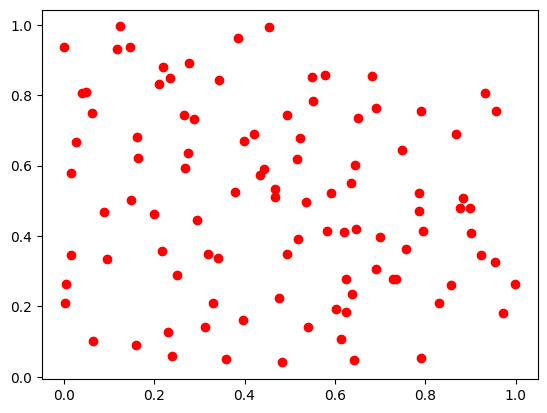

In [11]:
# Q3->Create a scatter plot using Matplotlib.
# Sol->
import matplotlib.pyplot as plt
import numpy as np

# Generate some random data
x = np.random.rand(100)
y = np.random.rand(100)

# Create a scatter plot
plt.scatter(x, y,color='red')

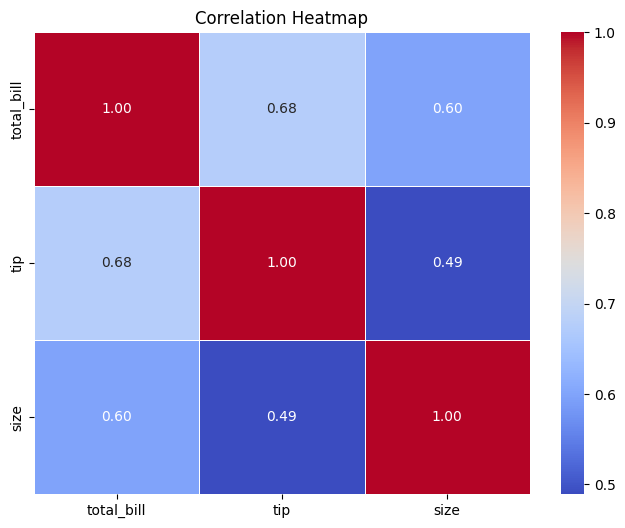

In [22]:
# Q4-> How do you calculate the correlation matrix using Seaborn and visualize it with a heatmap?
# sol->
import seaborn as sns
import matplotlib.pyplot as plt

# Load example dataset
tips = sns.load_dataset("tips")

# Compute correlation matrix
numerical_cols = tips.select_dtypes(include=['number']).columns
corr_matrix = tips[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Heatmap")
plt.show()



In [29]:
# Q5->Generate a bar plot using Plotly.
# Sol->
import plotly.express as px
import pandas as pd
df=pd.DataFrame({'A':[1,2,3],"B":[4,5,6]})
px.bar(df,x='A',y='B')

In [30]:
# Q6->Create a DataFrame and add a new column based on an existing column.
# Sol->
import pandas as pd
df=pd.DataFrame({'A':[1,2,3],"B":[4,5,6]})
df['A*2']=df['A']*2
df

,A,B,A*2
0,1,4,2
1,2,5,4
2,3,6,6


In [31]:
# Q7->A Write a program to perform element-wise multiplication of two NumPy arrays.
# Sol->
import numpy as np

# Define two NumPy arrays
array1 = np.array([1, 2, 3, 4, 5])
array2 = np.array([10, 20, 30, 40, 50])

# Element-wise multiplication
result = array1 * array2

# Print the result
print("Element-wise Multiplication:", result)


Element-wise Multiplication: [ 10  40  90 160 250]


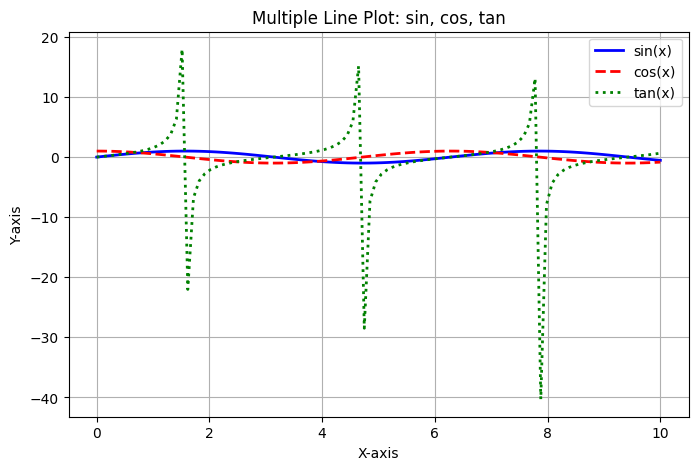

In [35]:
# Q8->Create a line plot with multiple lines using Matplotlib.
# Sol->
# Generate X values (0 to 10)
x = np.linspace(0, 10, 100)

# Generate Y values for multiple lines
y1 = np.sin(x)      # Sine wave
y2 = np.cos(x)      # Cosine wave
y3 = np.tan(x)      # Tangent wave (clipped to avoid extreme values)
plt.figure(figsize=(8, 5))  # Set figure size

# Plot lines
plt.plot(x, y1, label="sin(x)", color="b", linestyle="-", linewidth=2)
plt.plot(x, y2, label="cos(x)", color="r", linestyle="--", linewidth=2)
plt.plot(x, y3, label="tan(x)", color="g", linestyle=":", linewidth=2)

# Labels & Title
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Multiple Line Plot: sin, cos, tan")

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)  # Enable grid
plt.show()


In [36]:
# Q9->A Generate a Pandas DataFrame and filter rows where a column value is greater than a threshold.
# Sol->
import pandas as pd
# Sample data
data = {
    "Name": ["Alice", "Bob", "Charlie", "David", "Emma"],
    "Age": [25, 30, 35, 40, 22],
    "Salary": [50000, 60000, 70000, 80000, 45000]
}

# Create DataFrame
df = pd.DataFrame(data)

filtered_df = df[df["Salary"] > 60000]

# Display Filtered DataFrame
print(filtered_df)


      Name  Age  Salary
2  Charlie   35   70000
3    David   40   80000


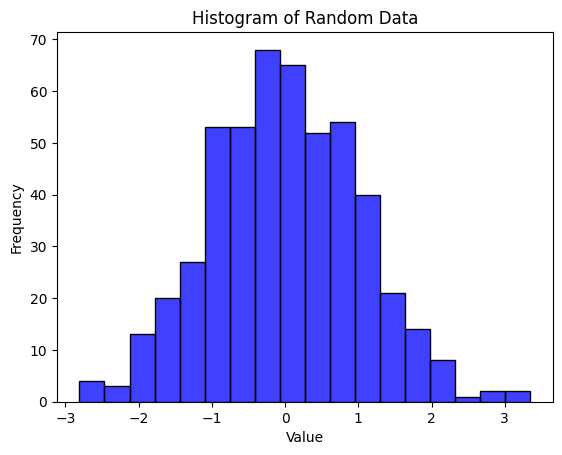

In [39]:
# Q10->A Create a histogram using Seaborn to visualize a distribution.
# Sol->
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Generate random data (normal distribution)
data = np.random.randn(500)  # 500 random values
# Create histogram
sns.histplot(data, color="blue")

# Add labels & title
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Random Data")

# Show the plot
plt.show()


In [43]:
# Q11-> Perform matrix multiplication using NumPy.
#Sol->
import numpy as np
a=np.matrix([[1,2,3],[4,5,6],[7,8,9]])
b=np.matrix([[4,7,2],[9,5,0],[3,5,9]])
print("matrix multiplication",a@b)
np.dot(a,b)

matrix multiplication [[ 31  32  29]
 [ 79  83  62]
 [127 134  95]]


matrix([[ 31,  32,  29],
        [ 79,  83,  62],
        [127, 134,  95]])

In [47]:
# Q12->Use Pandas to load a CSV file and display its first 5 rows.
# sol->
import pandas as pd
df1=pd.read_csv('Bank_churn.csv')
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [50]:
# Q13->A Create a 3D scatter plot using Plotly.
# Sol->
import plotly.express as px
# Generate random 3D data
df = pd.DataFrame({
    "X": np.random.randn(100),  # X-axis values
    "Y": np.random.randn(100),  # Y-axis values
    "Z": np.random.randn(100),  # Z-axis values
    "Category": np.random.choice(["A", "B", "C"], 100)  # Categories for color
})
# Create 3D scatter plot
fig = px.scatter_3d(df, x="X", y="Y", z="Z",
                     color="Category",  # Color by category
                     title="3D Scatter Plot",
                     opacity=0.8)

# Show the plot
fig.show()
